In [2]:
# load data 
train_path = '/home/kolade/repos/intercampusai2019/train.csv'
test_path = '/home/kolade/repos/intercampusai2019/test.csv'
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [3]:
# summary Information for both train and test data
print('Train data information: ')
train_data.info()
print('\n')
print('Test data information: ')
test_data.info()

Train data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status   

In [41]:
number_of_entries_train = train_data.shape[0]
number_of_entries_test =  test_data.shape[0]
print('Total number of train entry: ', number_of_entries_train)
print('Total number of test entry: ', number_of_entries_test)

Total number of train entry:  38312
Total number of test entry:  16496


In [42]:
#fix columns data type
train_data['Previous_Award'] = train_data['Previous_Award'].astype('object')
train_data['Targets_met'] =  train_data['Targets_met'].astype('object')

In [43]:
test_data['Previous_Award'] = train_data['Previous_Award'].astype('object')
test_data['Targets_met'] =  train_data['Targets_met'].astype('object')

In [4]:
# columns by type
def features_by_type(data):
    """classify features to types"""
    features_type = defaultdict(list)
    for i in data.columns:
        if i == 'EmployeeNo':
            features_type['id'].append(i)
        elif i == 'Promoted_or_Not':
            features_type['target'].append(i)
        elif data[i].dtype == int or data[i].dtype == float:
            features_type['numerical'].append(i)
        elif data[i].dtype == object:
            features_type['categorical'].append(i)
    return dict(features_type)
features_dictionary =features_by_type(train_data)


In [6]:
features_dictionary

{'id': ['EmployeeNo'],
 'categorical': ['Division',
  'Qualification',
  'Gender',
  'Channel_of_Recruitment',
  'State_Of_Origin',
  'Foreign_schooled',
  'Marital_Status',
  'Past_Disciplinary_Action',
  'Previous_IntraDepartmental_Movement',
  'No_of_previous_employers'],
 'numerical': ['Trainings_Attended',
  'Year_of_birth',
  'Last_performance_score',
  'Year_of_recruitment',
  'Targets_met',
  'Previous_Award',
  'Training_score_average'],
 'target': ['Promoted_or_Not']}

In [5]:
features = list(train_data.columns)

In [46]:
#summary statistics 
train_data[features_dictionary['numerical']].describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Training_score_average
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,55.366465
std,0.609443,7.646047,3.744135,4.261451,13.362741
min,2.000000,1950.000000,0.000000,1982.000000,31.000000
25%,2.000000,1982.000000,5.000000,2012.000000,43.000000
50%,2.000000,1988.000000,7.500000,2014.000000,52.000000
75%,2.000000,1992.000000,10.000000,2016.000000,68.000000
max,11.000000,2001.000000,12.500000,2018.000000,91.000000


In [47]:
test_data[features_dictionary['numerical']].describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Training_score_average
count,16496.000000,16496.000000,16496.000000,16496.000000,16496.000000
mean,2.251455,1986.161130,7.692016,2013.122393,55.433863
std,0.608865,7.708188,3.734303,4.273649,13.392306
min,2.000000,1958.000000,0.000000,1986.000000,31.000000
25%,2.000000,1982.000000,5.000000,2011.000000,43.000000
50%,2.000000,1988.000000,7.500000,2014.000000,52.000000
75%,2.000000,1992.000000,10.000000,2016.000000,68.000000
max,11.000000,2001.000000,12.500000,2018.000000,91.000000


In [48]:
train_data[features_dictionary['categorical']].describe(include = np.object)

,Division,Qualification,Gender,Channel_of_Recruitment,Targets_met,Previous_Award,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
count,38312,36633,38312,38312,38312,38312,38312,38312,38312,38312,38312,38312
unique,9,3,2,3,2,2,37,2,3,2,2,7
top,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,0,0,LAGOS,Yes,Married,No,No,1
freq,11695,25578,26880,21310,24788,37425,6204,34995,31022,38161,34709,18867


In [49]:
test_data[features_dictionary['categorical']].describe(include = np.object)

,Division,Qualification,Gender,Channel_of_Recruitment,Targets_met,Previous_Award,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
count,16496,15766,16496,16496,16496,16496,16496,16496,16496,16496,16496,16496
unique,9,3,2,3,2,2,37,2,3,2,2,7
top,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,0,0,LAGOS,Yes,Married,No,No,1
freq,5145,11091,11616,9136,10683,16120,2755,15086,13448,16417,14954,8060


The analysis carr

## Univariate Analysis

### Numerical 

In [50]:
numerical_features =features_dictionary['numerical']
numerical_features

['Trainings_Attended',
 'Year_of_birth',
 'Last_performance_score',
 'Year_of_recruitment',
 'Training_score_average']

#### Trainings_Attend

In [51]:
print("Unique Values in train",pd.unique(train_data['Trainings_Attended']))
print("\n")
print("Unique Values in train",pd.unique(test_data['Trainings_Attended']))

Unique Values in train [ 2  3  4  5  8  6  7  9 11 10]


Unique Values in train [ 2  3  4  5  8  6  7  9 11]


Text(0.5, 1.0, 'test_data')

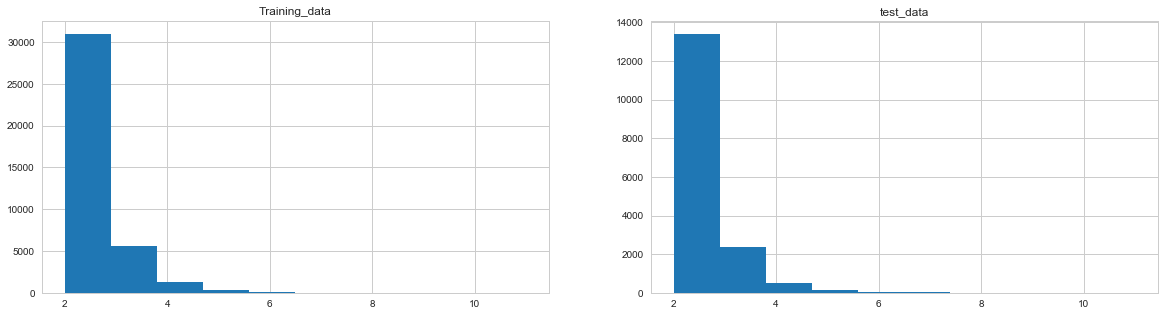

In [52]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
train_data['Trainings_Attended'].hist()
plt.title('Training_data')
plt.subplot(1, 2, 2)
test_data['Trainings_Attended'].hist()
plt.title('test_data')

In [53]:
#feature summary 
print("Trainings_Attended summary for train")
print(train_data['Trainings_Attended'].describe())
print("\n")
print("Trainings_Attended summary for test")
print(test_data['Trainings_Attended'].describe())

Trainings_Attended summary for train
count    38312.000000
mean         2.253680
std          0.609443
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         11.000000
Name: Trainings_Attended, dtype: float64


Trainings_Attended summary for test
count    16496.000000
mean         2.251455
std          0.608865
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         11.000000
Name: Trainings_Attended, dtype: float64


### Last_performance_score

Text(0.5, 1.0, 'test_data')

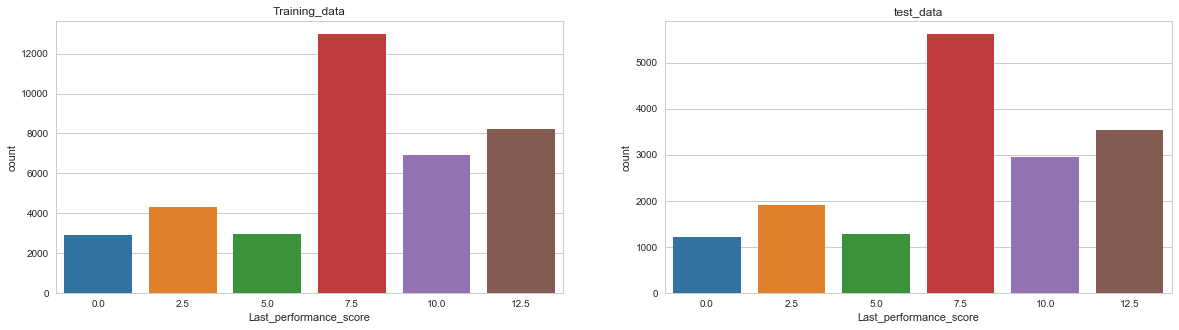

In [54]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(train_data['Last_performance_score'])
plt.title('Training_data')
plt.subplot(1, 2, 2)
sns.countplot(test_data['Last_performance_score'])
plt.title('test_data')

In [55]:
print("Unique Values in train",sorted(pd.unique(train_data['Last_performance_score'])))
print("\n")
print("Unique Values in test",sorted(pd.unique(test_data['Last_performance_score'])))

Unique Values in train [0.0, 2.5, 5.0, 7.5, 10.0, 12.5]


Unique Values in test [0.0, 2.5, 5.0, 7.5, 10.0, 12.5]


In [56]:
train_data['Last_performance_score'].describe()

count    38312.000000
mean         7.698959
std          3.744135
min          0.000000
25%          5.000000
50%          7.500000
75%         10.000000
max         12.500000
Name: Last_performance_score, dtype: float64

### Training_score_Average

Text(0.5, 1.0, 'test_data')

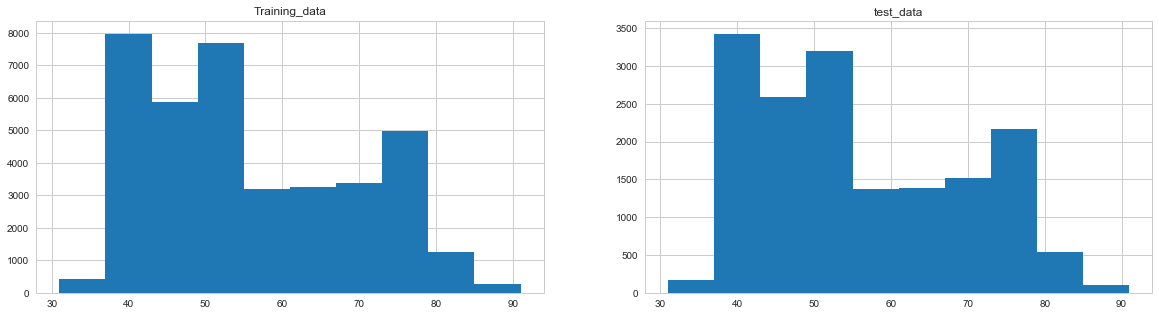

In [57]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
train_data['Training_score_average'].hist()
plt.title('Training_data')
plt.subplot(1, 2, 2)
test_data['Training_score_average'].hist()
plt.title('test_data')

In [58]:
#feature summary 
print("Training score average summary for train")
print(train_data['Training_score_average'].describe())
print("\n")
print("Training score average summary for test")
print(test_data['Training_score_average'].describe())

Training score average summary for train
count    38312.000000
mean        55.366465
std         13.362741
min         31.000000
25%         43.000000
50%         52.000000
75%         68.000000
max         91.000000
Name: Training_score_average, dtype: float64


Training score average summary for test
count    16496.000000
mean        55.433863
std         13.392306
min         31.000000
25%         43.000000
50%         52.000000
75%         68.000000
max         91.000000
Name: Training_score_average, dtype: float64


### Year of birth

Text(0.5, 1.0, 'Test Data')

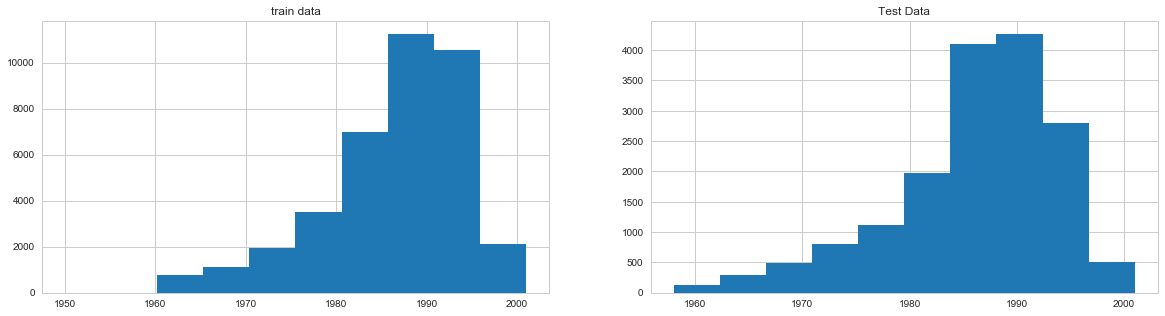

In [59]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
train_data['Year_of_birth'].hist()
plt.title('train data')
plt.subplot(1, 2, 2)
test_data['Year_of_birth'].hist()
plt.title('Test Data')

In [60]:
print("Train summary for Year of Birth")
print(train_data['Year_of_birth'].describe())
print("\n")
print("Training score average summary for Year of birth")
print(test_data['Year_of_birth'].describe())

Train summary for Year of Birth
count    38312.000000
mean      1986.209334
std          7.646047
min       1950.000000
25%       1982.000000
50%       1988.000000
75%       1992.000000
max       2001.000000
Name: Year_of_birth, dtype: float64


Training score average summary for Year of birth
count    16496.000000
mean      1986.161130
std          7.708188
min       1958.000000
25%       1982.000000
50%       1988.000000
75%       1992.000000
max       2001.000000
Name: Year_of_birth, dtype: float64


### Year of Recuitment

Text(0.5, 1.0, 'Test Data')

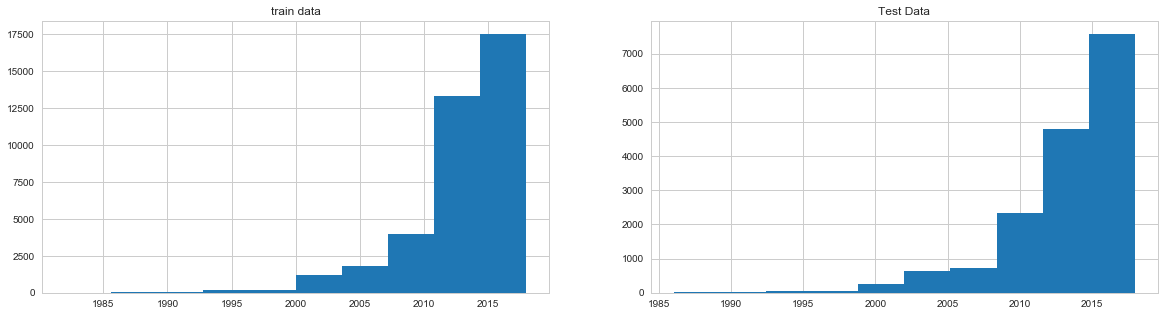

In [61]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
train_data['Year_of_recruitment'].hist()
plt.title('train data')
plt.subplot(1, 2, 2)
test_data['Year_of_recruitment'].hist()
plt.title('Test Data')

In [62]:
print("Train summary for Year of Birth")
print(train_data['Year_of_recruitment'].describe())
print("\n")
print("Training score average summary for Year of recruitment")
print(test_data['Year_of_recruitment'].describe())

Train summary for Year of Birth
count    38312.000000
mean      2013.139695
std          4.261451
min       1982.000000
25%       2012.000000
50%       2014.000000
75%       2016.000000
max       2018.000000
Name: Year_of_recruitment, dtype: float64


Training score average summary for Year of recruitment
count    16496.000000
mean      2013.122393
std          4.273649
min       1986.000000
25%       2011.000000
50%       2014.000000
75%       2016.000000
max       2018.000000
Name: Year_of_recruitment, dtype: float64


## Categorical

In [63]:
categorical =features_dictionary['categorical']

#### Division

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

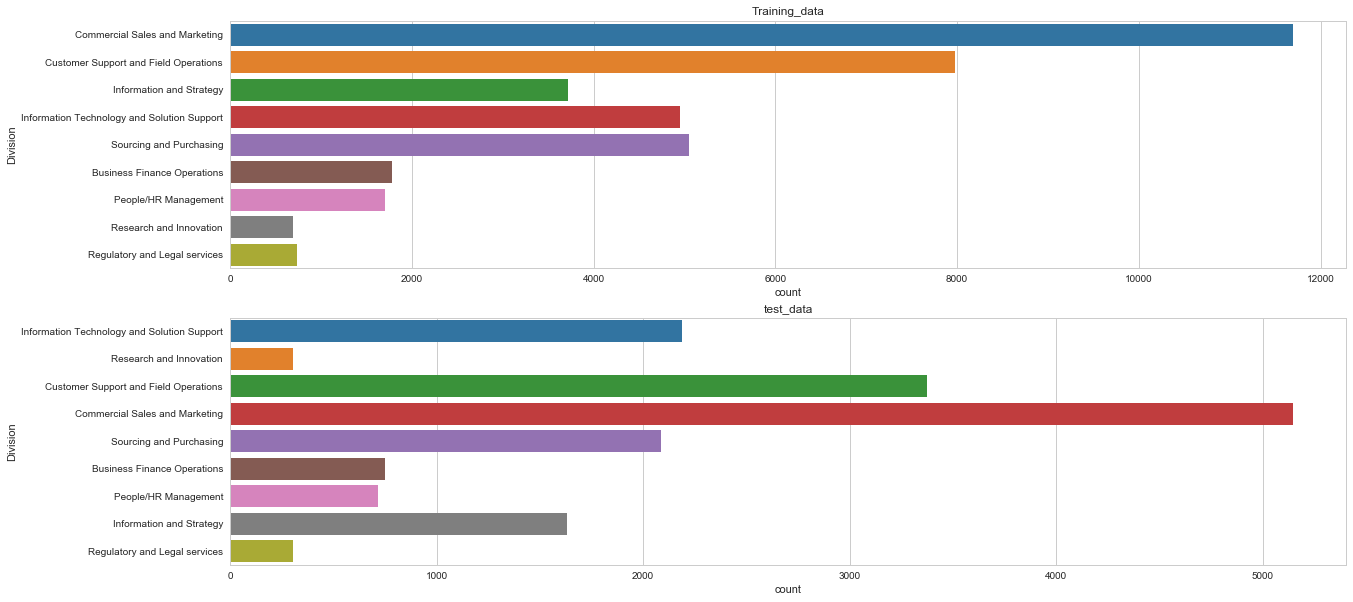

In [64]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,10), sharex=False)
sns.countplot(y='Division', data=train_data['Division'].to_frame('Division'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Division', data=test_data['Division'].to_frame('Division'), ax=axarr[1])
axarr[1].set_title('test_data')

In [65]:
print("Unique Values in train",sorted(pd.unique(train_data['Division'])))
print("\n")
print("Unique Values in test",sorted(pd.unique(test_data['Division'])))

Unique Values in train ['Business Finance Operations', 'Commercial Sales and Marketing', 'Customer Support and Field Operations', 'Information Technology and Solution Support', 'Information and Strategy', 'People/HR Management', 'Regulatory and Legal services', 'Research and Innovation', 'Sourcing and Purchasing']


Unique Values in test ['Business Finance Operations', 'Commercial Sales and Marketing', 'Customer Support and Field Operations', 'Information Technology and Solution Support', 'Information and Strategy', 'People/HR Management', 'Regulatory and Legal services', 'Research and Innovation', 'Sourcing and Purchasing']


In [66]:
print("Unique Values in train")
print(train_data['Division'].describe())
print("\n")
print("Unique Values in test")
print(test_data['Division'].describe())

Unique Values in train
count                              38312
unique                                 9
top       Commercial Sales and Marketing
freq                               11695
Name: Division, dtype: object


Unique Values in test
count                              16496
unique                                 9
top       Commercial Sales and Marketing
freq                                5145
Name: Division, dtype: object


### Qualififcation

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

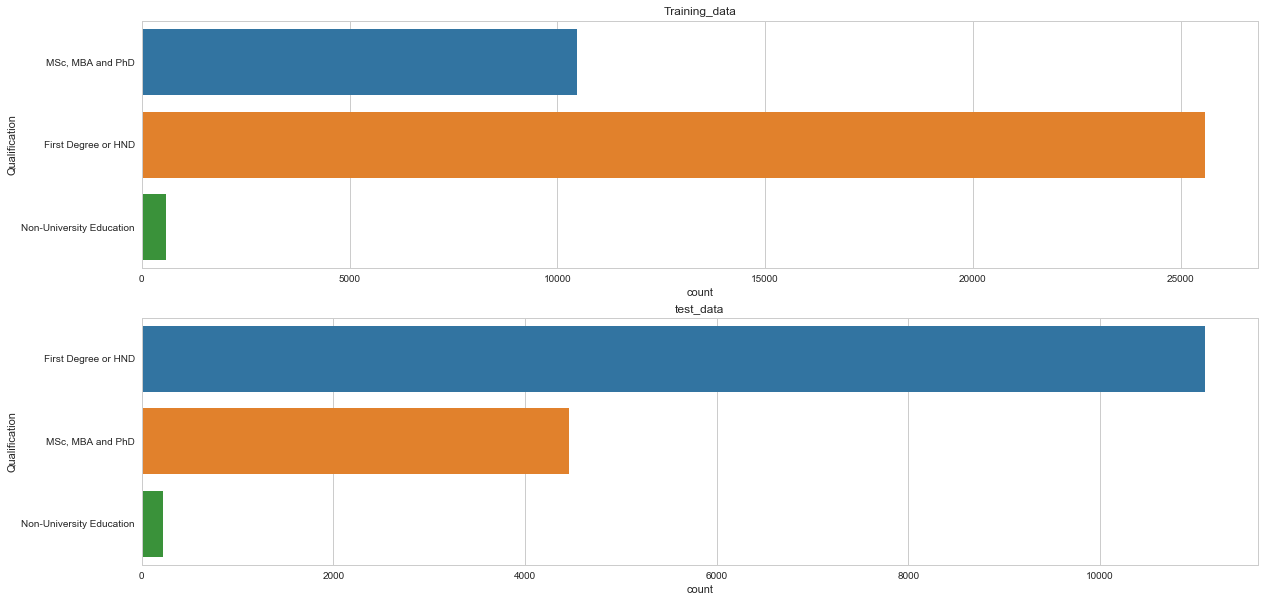

In [67]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,10), sharex=False)
sns.countplot(y='Qualification', data=train_data['Qualification'].to_frame('Qualification'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Qualification', data=test_data['Qualification'].to_frame('Qualification'), ax=axarr[1])
axarr[1].set_title('test_data')

In [68]:
print("Unique Values in train")
print(train_data['Qualification'].describe())
print("\n")
print("Unique Values in test")
print(test_data['Qualification'].describe())

Unique Values in train
count                   36633
unique                      3
top       First Degree or HND
freq                    25578
Name: Qualification, dtype: object


Unique Values in test
count                   15766
unique                      3
top       First Degree or HND
freq                    11091
Name: Qualification, dtype: object


## Gender

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

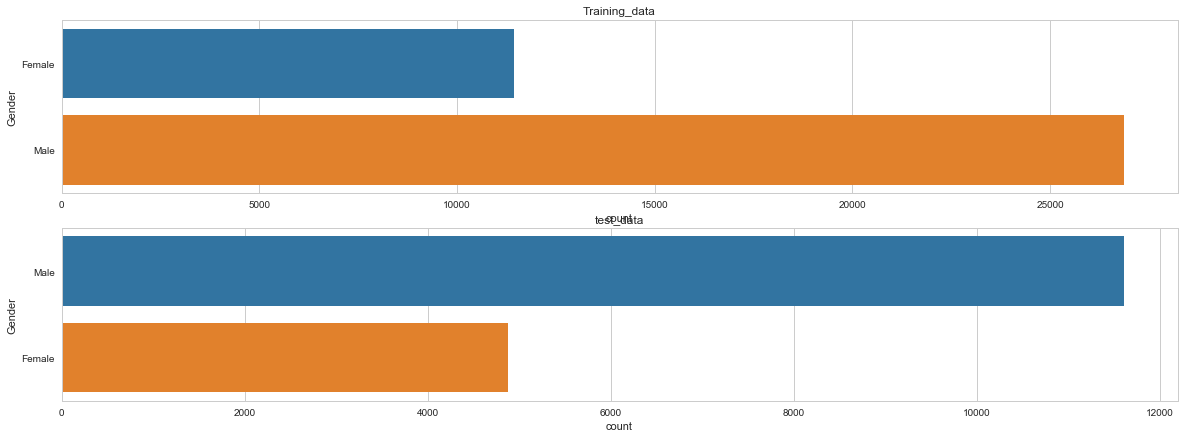

In [69]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Gender', data=train_data['Gender'].to_frame('Gender'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Gender', data=test_data['Gender'].to_frame('Gender'), ax=axarr[1])
axarr[1].set_title('test_data')

In [70]:
print("Unique Values in train")
print(train_data['Gender'].describe())
print("\n")
print("Unique Values in test")
print(test_data['Gender'].describe())

Unique Values in train
count     38312
unique        2
top        Male
freq      26880
Name: Gender, dtype: object


Unique Values in test
count     16496
unique        2
top        Male
freq      11616
Name: Gender, dtype: object


### Channel_of_Recruitment

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

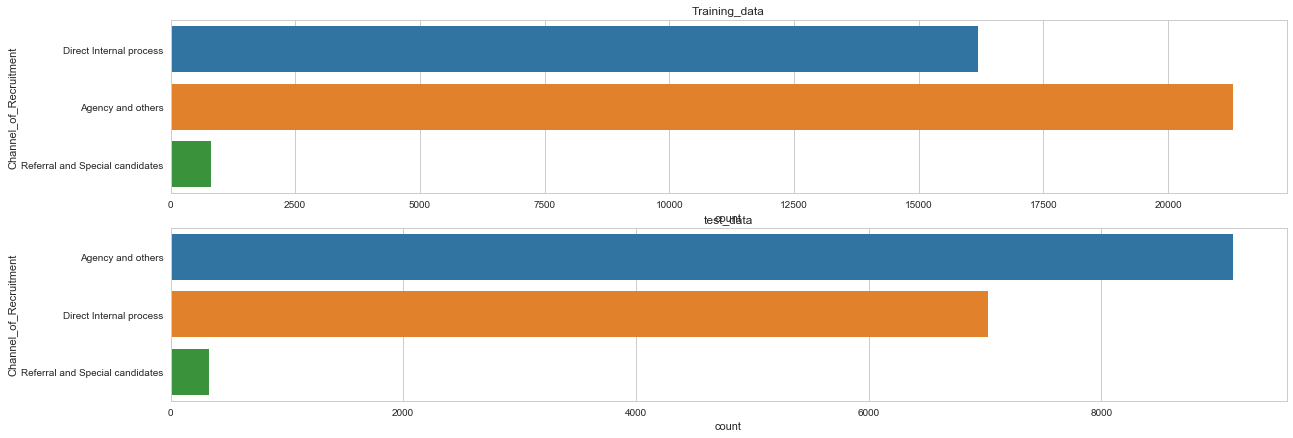

In [71]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Channel_of_Recruitment', data=train_data['Channel_of_Recruitment'].to_frame('Channel_of_Recruitment'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Channel_of_Recruitment', data=test_data['Channel_of_Recruitment'].to_frame('Channel_of_Recruitment'), ax=axarr[1])
axarr[1].set_title('test_data')

In [72]:
print("Unique Values in train")
print(train_data['Channel_of_Recruitment'].describe())
print("\n")
print("Unique Values in test")
print(test_data['Channel_of_Recruitment'].describe())

Unique Values in train
count                 38312
unique                    3
top       Agency and others
freq                  21310
Name: Channel_of_Recruitment, dtype: object


Unique Values in test
count                 16496
unique                    3
top       Agency and others
freq                   9136
Name: Channel_of_Recruitment, dtype: object


### Targets_met

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

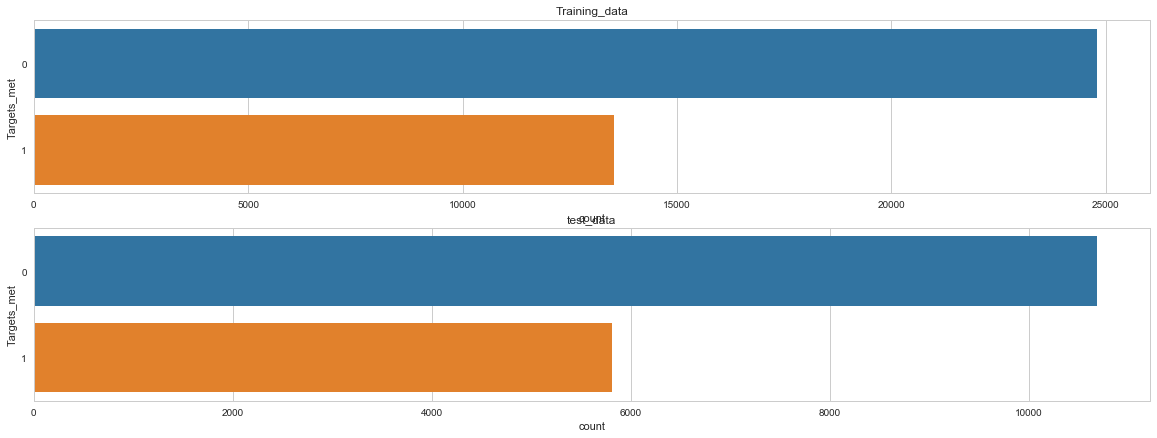

In [73]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Targets_met', data=train_data['Targets_met'].to_frame('Targets_met'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Targets_met', data=test_data['Targets_met'].to_frame('Targets_met'), ax=axarr[1])
axarr[1].set_title('test_data')

In [74]:
print("Unique Values in train")
print(train_data['Channel_of_Recruitment'].describe())
print("\n")
print("Unique Values in test")
print(test_data['Channel_of_Recruitment'].describe())

Unique Values in train
count                 38312
unique                    3
top       Agency and others
freq                  21310
Name: Channel_of_Recruitment, dtype: object


Unique Values in test
count                 16496
unique                    3
top       Agency and others
freq                   9136
Name: Channel_of_Recruitment, dtype: object


### Previous_Award

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

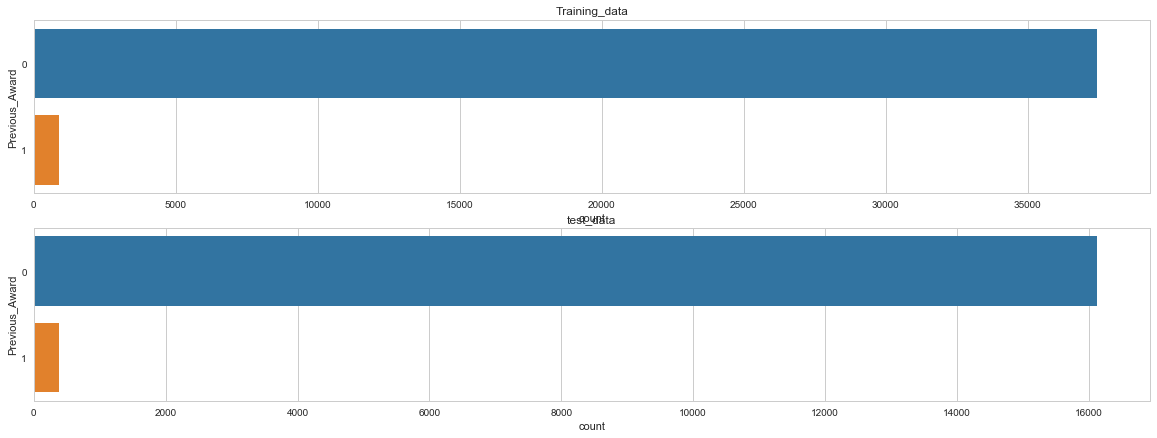

In [75]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Previous_Award', data=train_data['Previous_Award'].to_frame('Previous_Award'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Previous_Award', data=test_data['Previous_Award'].to_frame('Previous_Award'), ax=axarr[1])
axarr[1].set_title('test_data')

### State of Origin

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

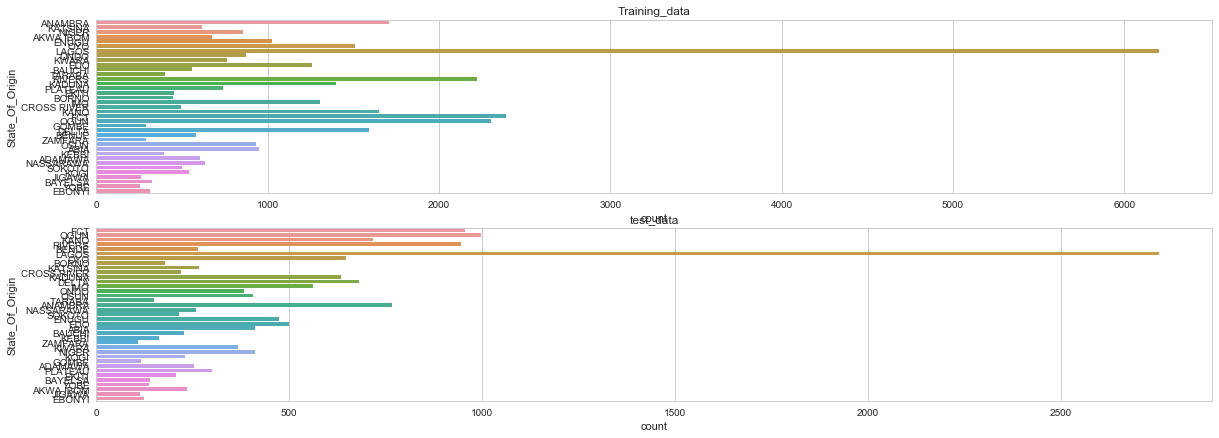

In [76]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='State_Of_Origin', data=train_data['State_Of_Origin'].to_frame('State_Of_Origin'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='State_Of_Origin', data=test_data['State_Of_Origin'].to_frame('State_Of_Origin'), ax=axarr[1])
axarr[1].set_title('test_data')

### Foreign_schooled

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

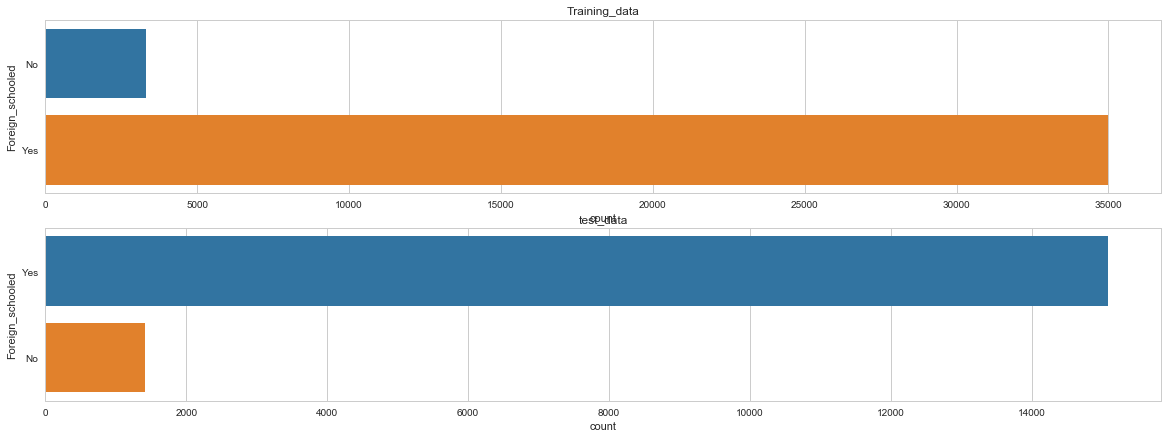

In [77]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Foreign_schooled', data=train_data['Foreign_schooled'].to_frame('Foreign_schooled'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Foreign_schooled', data=test_data['Foreign_schooled'].to_frame('Foreign_schooled'), ax=axarr[1])
axarr[1].set_title('test_data')

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

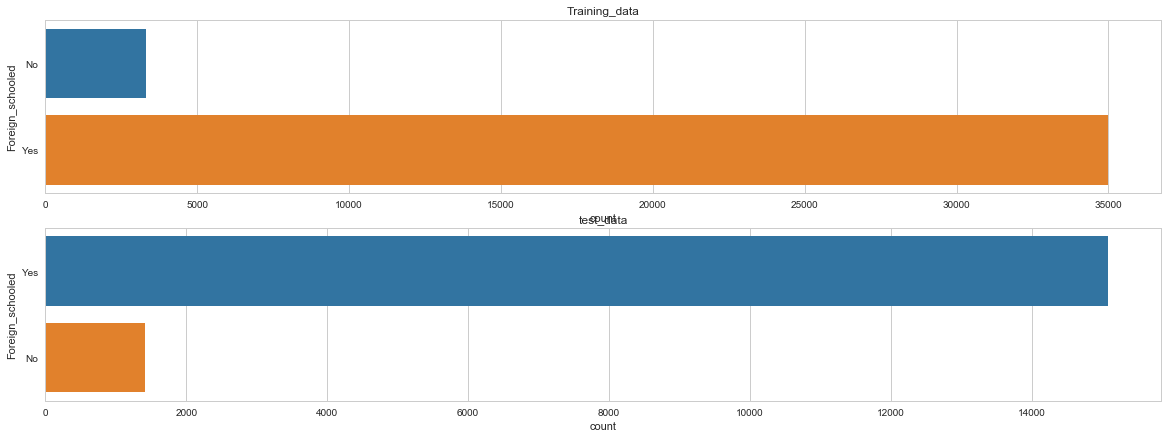

In [78]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Foreign_schooled', data=train_data['Foreign_schooled'].to_frame('Foreign_schooled'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Foreign_schooled', data=test_data['Foreign_schooled'].to_frame('Foreign_schooled'), ax=axarr[1])
axarr[1].set_title('test_data')

### 'Marital_Status'


Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

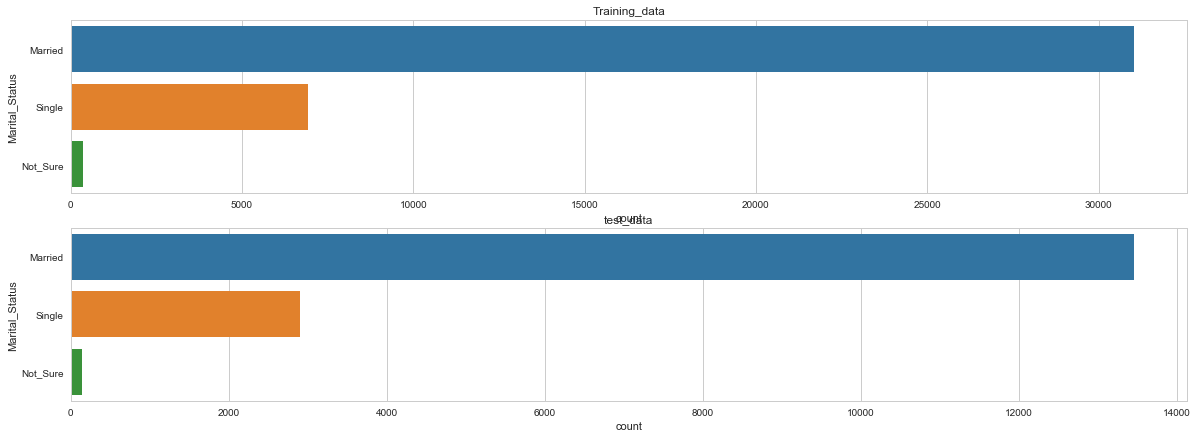

In [79]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Marital_Status', data=train_data['Marital_Status'].to_frame('Marital_Status'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Marital_Status', data=test_data['Marital_Status'].to_frame('Marital_Status'), ax=axarr[1])
axarr[1].set_title('test_data')

### Past_Disciplinary_Action

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

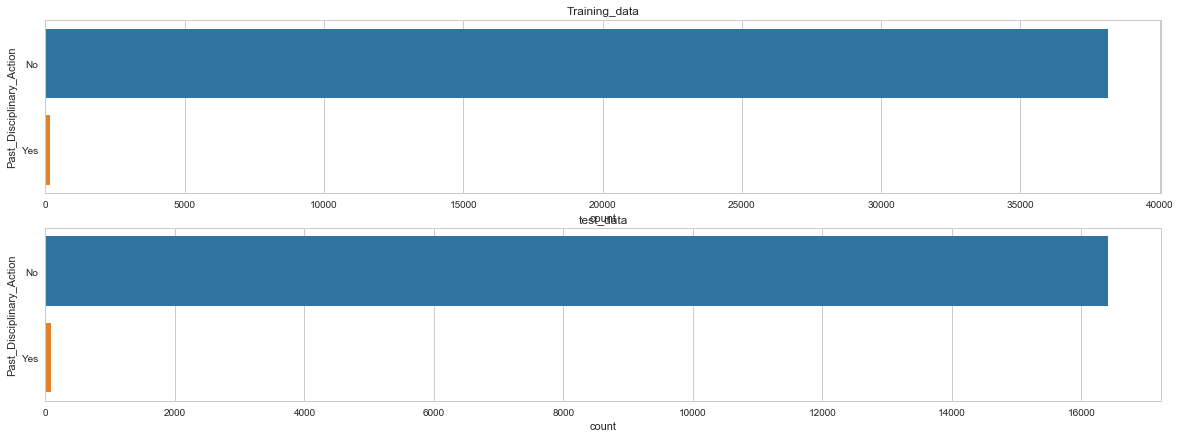

In [80]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Past_Disciplinary_Action', data=train_data['Past_Disciplinary_Action'].to_frame('Past_Disciplinary_Action'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Past_Disciplinary_Action', data=test_data['Past_Disciplinary_Action'].to_frame('Past_Disciplinary_Action'), ax=axarr[1])
axarr[1].set_title('test_data')

### Previous_IntraDepartmental_Movement

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

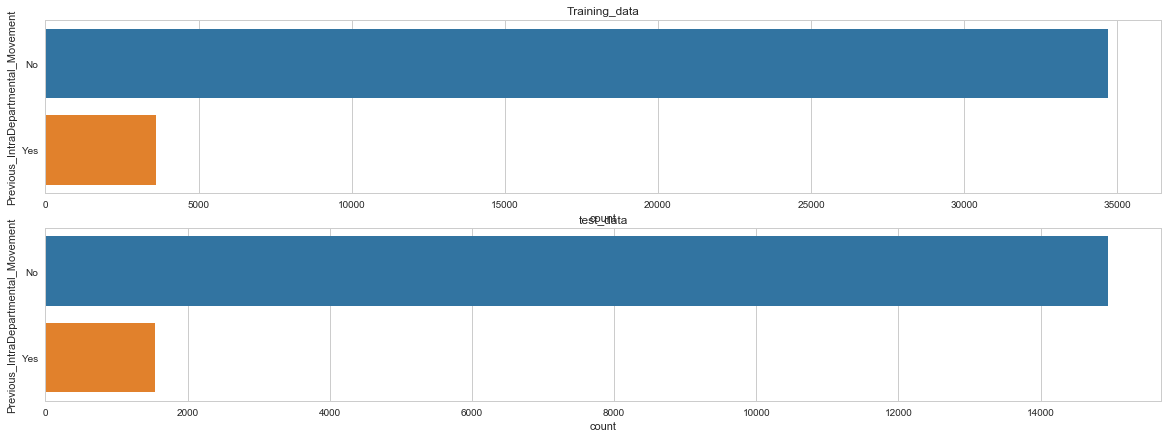

In [81]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='Previous_IntraDepartmental_Movement', data=train_data['Previous_IntraDepartmental_Movement'].to_frame('Previous_IntraDepartmental_Movement'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='Previous_IntraDepartmental_Movement', data=test_data['Previous_IntraDepartmental_Movement'].to_frame('Previous_IntraDepartmental_Movement'), ax=axarr[1])
axarr[1].set_title('test_data')

### No_of_previous_employers

Text(0.5, 1.0, 'test_data')

<Figure size 1440x720 with 0 Axes>

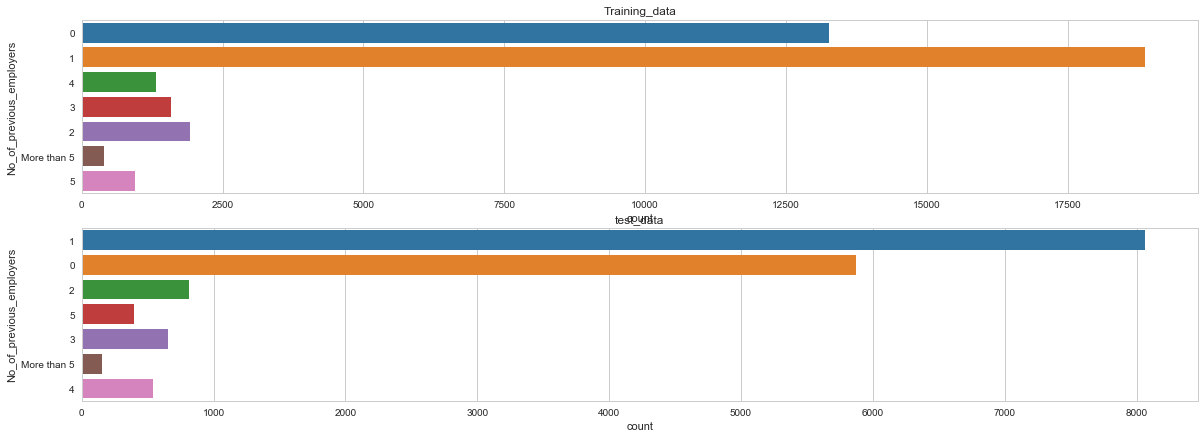

In [82]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,10)) 
f, axarr = plt.subplots(2, figsize=(20,7), sharex=False)
sns.countplot(y='No_of_previous_employers', data=train_data['No_of_previous_employers'].to_frame('No_of_previous_employers'), ax=axarr[0])
axarr[0].set_title('Training_data')
sns.countplot(y='No_of_previous_employers', data=test_data['No_of_previous_employers'].to_frame('No_of_previous_employers'), ax=axarr[1])
axarr[1].set_title('test_data')

In [83]:
print("Unique Values in train",sorted(pd.unique(train_data['No_of_previous_employers'])))
print("\n")
print("Unique Values in test",sorted(pd.unique(test_data['No_of_previous_employers'])))

Unique Values in train ['0', '1', '2', '3', '4', '5', 'More than 5']


Unique Values in test ['0', '1', '2', '3', '4', '5', 'More than 5']


In [84]:
print("Unique Values in train")
print(train_data['No_of_previous_employers'].describe())
print("\n")
print("Unique Values in test")
print(test_data['No_of_previous_employers'].describe())

Unique Values in train
count     38312
unique        7
top           1
freq      18867
Name: No_of_previous_employers, dtype: object


Unique Values in test
count     16496
unique        7
top           1
freq       8060
Name: No_of_previous_employers, dtype: object


### Target

Text(0.5, 1, 'Training_data')

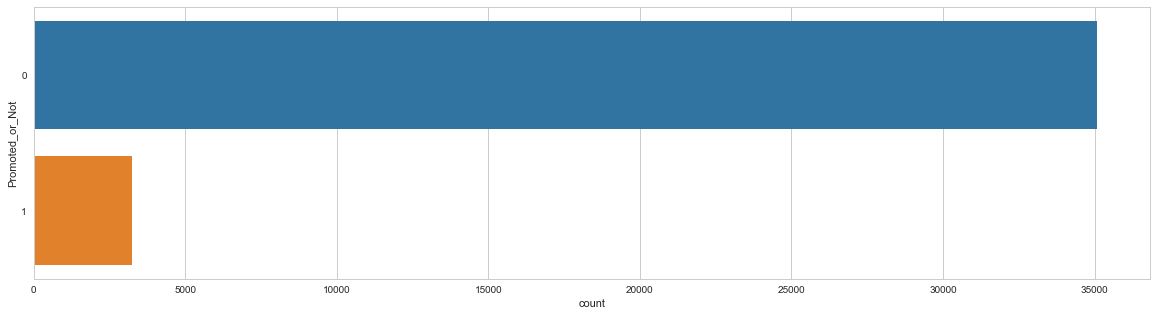

In [85]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.countplot(y='Promoted_or_Not', data=train_data['Promoted_or_Not'].to_frame('Promoted_or_Not'))
axarr[0].set_title('Training_data')


# Multivariate analysis

In [ ]:
# The numerical with target 

In [98]:
numerical_features_with_target = numerical_features
numerical_features_with_target.extend(features_dictionary['target'])

In [102]:
train_data_numerical = train_data[numerical_features_with_target].drop('Last_performance_score', axis = 1)

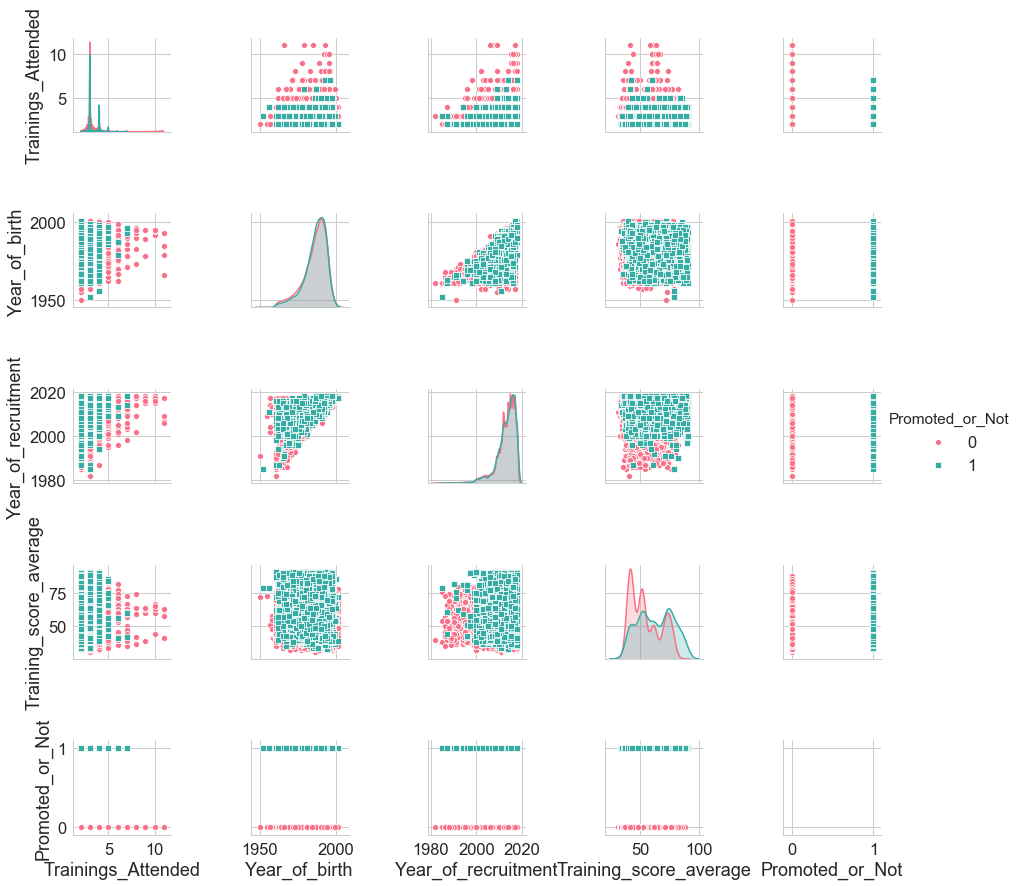

In [125]:
sns.pairplot(train_data_numerical, hue="Promoted_or_Not", markers=["o", "s"], palette="husl")


## Missing Value

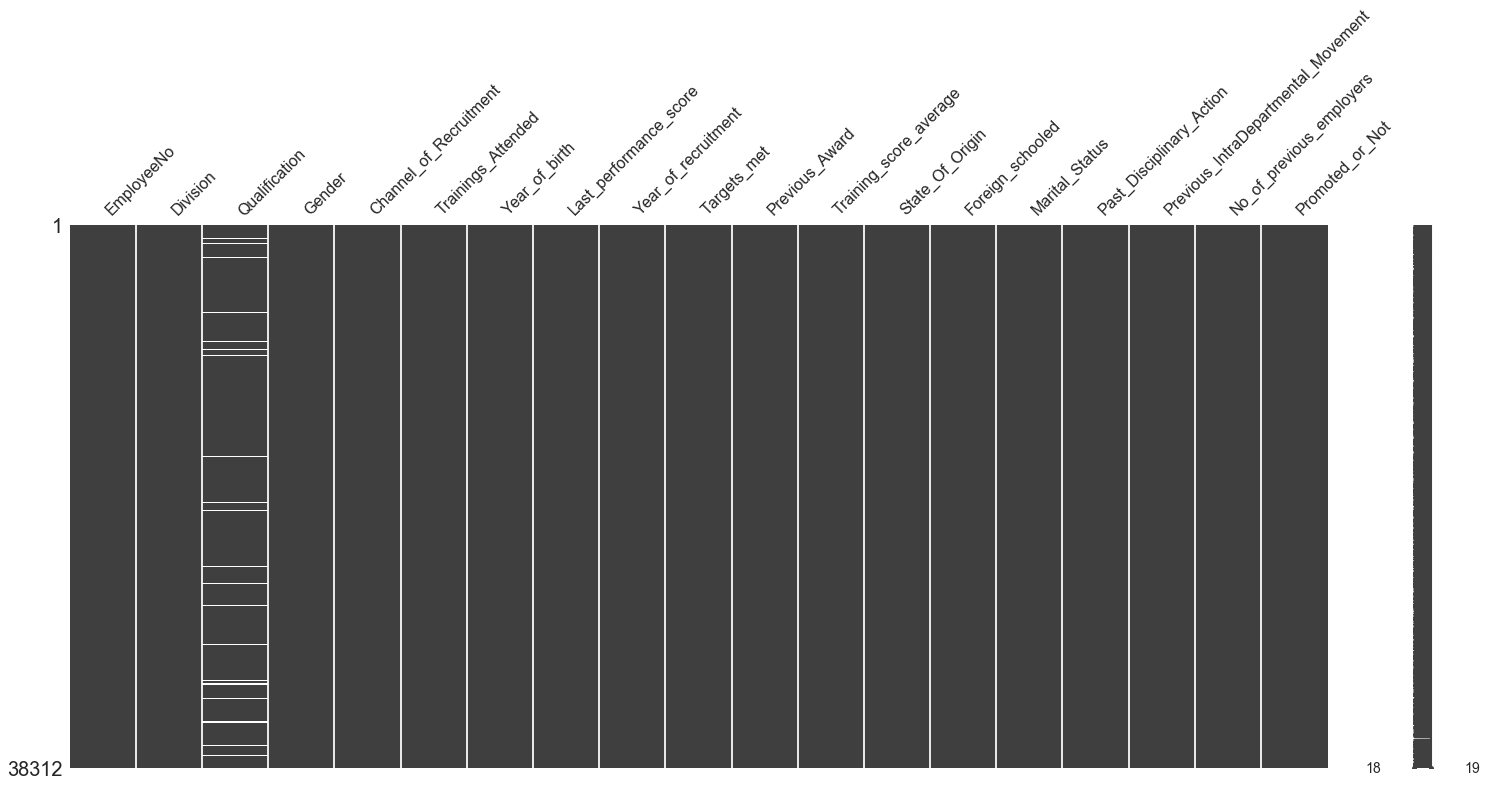

In [114]:
missingno.matrix(train_data)

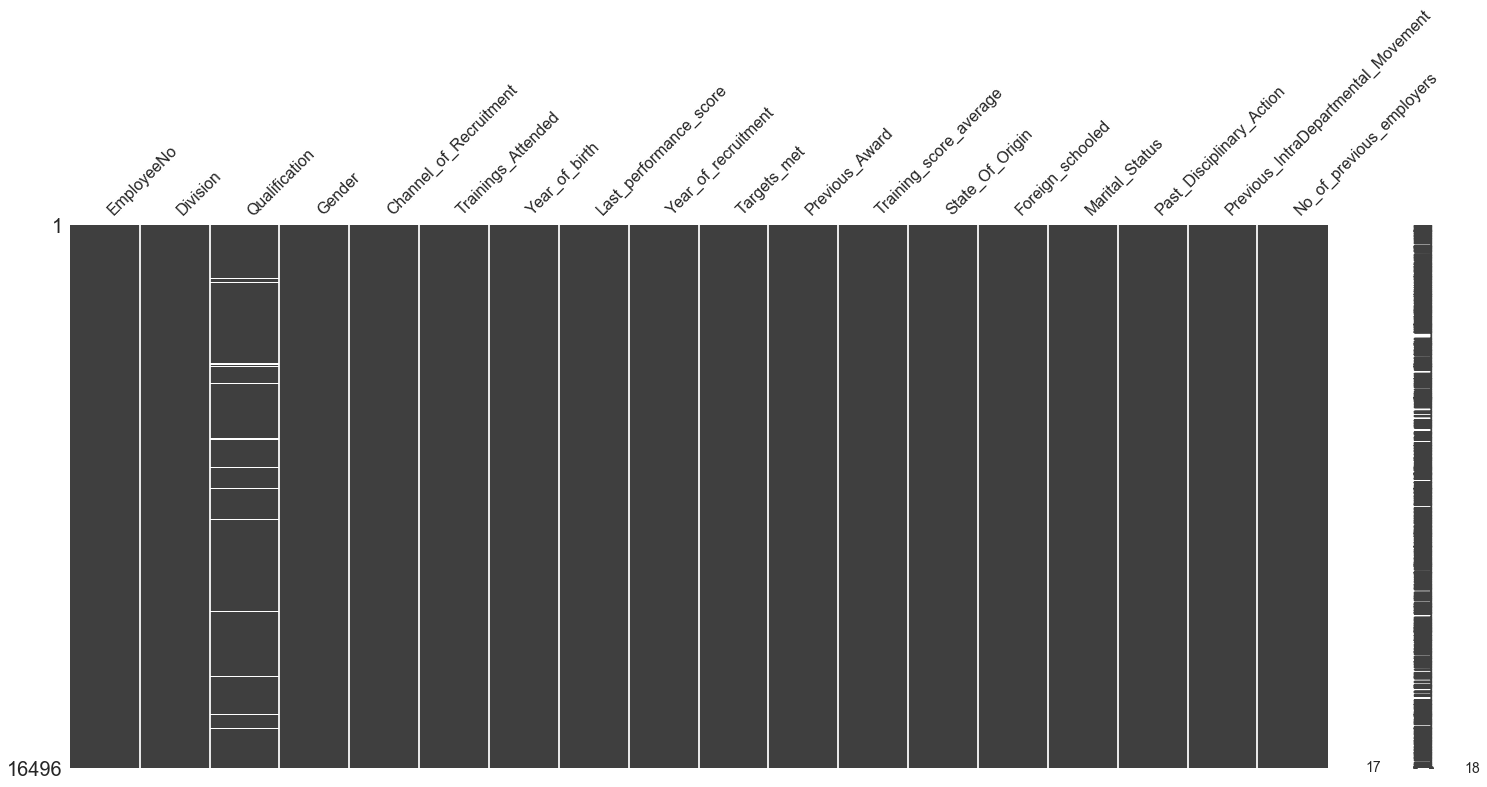

In [115]:
missingno.matrix(test_data)

In [119]:
train_data['Qualification'].isnull().sum()/train_data.shape[0]

0.043824389225308

In [120]:
test_data['Qualification'].isnull().sum()/test_data.shape[0]

0.044253152279340444

## Correlation

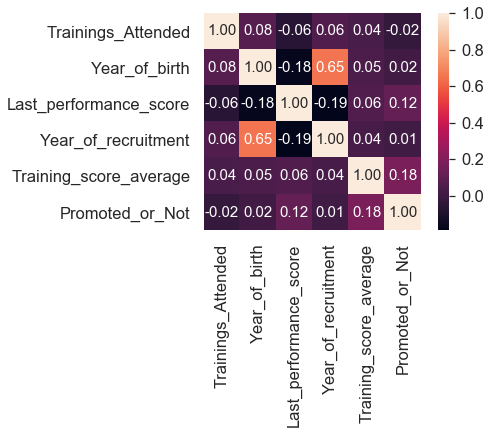

In [122]:
cm = np.corrcoef(train_data[numerical_features].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',
                 annot_kws={'size': 15},yticklabels=numerical_features,xticklabels=numerical_features)

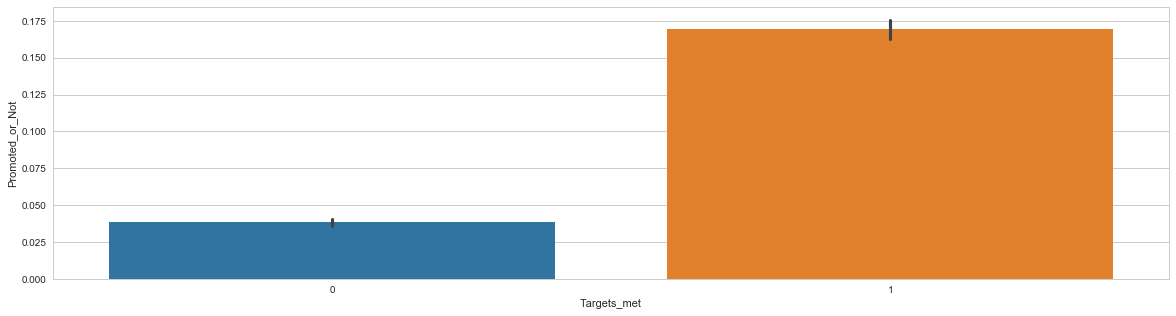

In [7]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
sns.barplot(train_data['Targets_met'],train_data[''])

In [197]:
train_data['Training_score_average'][train_data['Promoted_or_Not'].apply(lambda x: bool(x))].value_counts()

74    107
73     98
75     98
52     98
51     97
62     92
53     92
50     88
72     84
76     81
54     80
63     79
78     77
43     75
42     75
77     74
40     74
41     73
56     65
55     65
70     64
49     62
61     61
84     59
64     58
82     57
71     56
57     54
79     54
59     53
81     53
86     52
39     52
80     50
60     50
44     49
48     49
69     48
83     48
85     47
66     43
58     39
46     37
89     36
67     36
65     35
47     34
68     31
90     31
87     31
88     29
45     27
38     25
91     24
37     19
35      7
36      6
34      2
33      1
Name: Training_score_average, dtype: int64

In [208]:
train_data[(train_data['Last_performance_score']==0.0) & (train_data['Promoted_or_Not']== 1) & (train_data['Previous_IntraDepartmental_Movement']== 'Yes')]

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
693,YAK/S/00975,Information and Strategy,First Degree or HND,Male,Agency and others,2,1993,0.0,2018,1,0,78,NIGER,Yes,Married,No,Yes,1,1
5622,YAK/S/07932,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1993,0.0,2018,1,0,76,OSUN,Yes,Married,No,Yes,1,1
7858,YAK/S/11111,Customer Support and Field Operations,First Degree or HND,Female,Direct Internal process,3,1991,0.0,2018,1,0,49,IMO,No,Married,No,Yes,1,1
8099,YAK/S/11470,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1998,0.0,2018,1,0,80,ONDO,Yes,Married,No,Yes,0,1
10941,YAK/S/15529,Information Technology and Solution Support,First Degree or HND,Male,Direct Internal process,2,1998,0.0,2018,1,0,73,NASSARAWA,Yes,Single,No,Yes,1,1
17445,YAK/S/24892,People/HR Management,First Degree or HND,Female,Referral and Special candidates,2,1994,0.0,2018,1,0,35,OGUN,Yes,Single,No,Yes,0,1
25711,YAK/S/36703,Sourcing and Purchasing,First Degree or HND,Female,Agency and others,2,1991,0.0,2018,1,0,64,NASSARAWA,Yes,Married,No,Yes,1,1
27695,YAK/S/39519,Commercial Sales and Marketing,NaN,Male,Agency and others,2,1998,0.0,2018,0,0,59,EBONYI,Yes,Married,No,Yes,0,1
27738,YAK/S/39585,Information and Strategy,First Degree or HND,Male,Agency and others,3,1995,0.0,2018,0,0,75,AKWA IBOM,Yes,Married,No,Yes,0,1
30243,YAK/S/43187,Customer Support and Field Operations,Non-University Education,Female,Direct Internal process,2,1997,0.0,2018,0,0,89,CROSS RIVER,Yes,Single,No,Yes,1,1


In [196]:
train_data[(train_data['Last_performance_score']== 7.5) & (train_data['Promoted_or_Not']==1) ]

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
44,YAK/S/00070,Information and Strategy,First Degree or HND,Male,Agency and others,2,1991,7.5,2012,1,0,76,GOMBE,No,Married,No,No,0,1
94,YAK/S/00134,Information and Strategy,First Degree or HND,Male,Agency and others,2,1989,7.5,2011,0,0,81,KADUNA,Yes,Married,No,No,1,1
110,YAK/S/00155,Customer Support and Field Operations,"MSc, MBA and PhD",Male,Agency and others,2,1978,7.5,2012,1,0,48,KEBBI,Yes,Married,No,No,More than 5,1
231,YAK/S/00322,Customer Support and Field Operations,"MSc, MBA and PhD",Male,Agency and others,2,1987,7.5,2016,0,0,67,ADAMAWA,Yes,Single,No,No,0,1
281,YAK/S/00392,Commercial Sales and Marketing,"MSc, MBA and PhD",Male,Agency and others,2,1984,7.5,2009,1,0,41,IMO,Yes,Married,No,No,3,1
315,YAK/S/00450,Customer Support and Field Operations,First Degree or HND,Female,Agency and others,2,1976,7.5,2015,0,1,57,JIGAWA,Yes,Married,No,No,0,1
332,YAK/S/00477,Sourcing and Purchasing,"MSc, MBA and PhD",Male,Agency and others,2,1976,7.5,2003,0,0,79,LAGOS,Yes,Married,No,No,0,1
403,YAK/S/00565,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1981,7.5,2001,1,0,47,KANO,Yes,Single,No,No,3,1
499,YAK/S/00706,Information and Strategy,First Degree or HND,Female,Direct Internal process,3,1994,7.5,2016,1,0,77,ABIA,Yes,Single,No,No,0,1
503,YAK/S/00716,Information and Strategy,First Degree or HND,Male,Agency and others,3,1993,7.5,2017,1,0,78,LAGOS,Yes,Married,No,No,1,1
